## Setup and init H2O

Ref: Python Deep Learning (Valentino ZoccaGianmario SpacagnaDaniel SlaterPeter Roelants)

In [24]:
! apt-get install default-jre
! java -version
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


Import the necessary libraries

In [25]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12

In [26]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 mins 48 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_s3nqys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.148 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


We are importing the data from the H2O repository (this is a readapted version of the original dataset in order to make it easier to parse and load into H2O)

In [27]:
train_with_label = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz")
test_with_label = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz")


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [28]:
train_with_label.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,105,105,105,123,253,253,253,253,255,253,156,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,252,252,252,252,252,252,252,252,253,252,252,231,164,18,0,0,0,0,0,0,0,0,0,0,0,0,0,208,252,252,252,252,252,252,252,252,253,252,252,252,252,74,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,210,253,205,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,252,252,252,229,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,252,252,252,253,212,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,91,202,254,254,254,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,60,225,253,253,253,253,253,241,96,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,135,253,253,253,253,253,253,253,253,253,253,32,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,216,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,254,162,40,148,185,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,127,252,181,133,233,254,254,226,39,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,133,151,254,254,220,93,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,83,254,253,253,253,253,253,253,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,253,254,253,253,253,253,253,253,170,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,253,254,253,206,84,170,242,253,253,24,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,254,254,254,254,255,223,141,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,253,253,253,253,253,253,253,64,0,0,0,0,0,0,0,0,0,0
0,0,0,

The loaded train and test datasets represent one digit image for each row and contain 784 columns representing grayscale values in a scale from 0 to 255 of each pixel of a 28 x 28 image grid plus the last column used as label (the digital numner).

We will use only the first 784 as predictors and leave the label only for validation.

In [ ]:
predictors = list(range(0,784))
train = train_with_label[predictors]
test=test_with_label[predictors]

Let us take a look at the shape of train, train_with_label, test and  test_with_label

In [ ]:
print(train.shape)
print(train_with_label.shape)
print(test.shape)
print(test_with_label.shape)


(60000, 784)
(60000, 785)
(10000, 784)
(10000, 785)


H2O tutorial suggests a shallow model made of just one hidden layer of 20 neurons using a hyperbolic tangent as an activation function and 100 epochs (100 scans over the data).

The goal is not to learn how to tune the network, but rather understand the intuitions and concepts behind the anomaly detection approach.  What we need to understand is that the encoder capacity depends on the number of hidden neurons.  A too large capacity would lead to an identity function model, which would not learn any nteresting structures.  In our case, we setting a low capacity, from 784 pixels to 20 nodes.  This way, we will force the model to learn how to best approimate an identiry function by only using a few features representing the relevant structures of the data.



In [ ]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
model = H2OAutoEncoderEstimator(activation="Tanh", hidden=[20], ignore_const_cols=False, epochs = 1)
model.train(x=predictors, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


After training, we can predict the digits in the test set, reconstructed using our new reduced dimensionality representation, and rank them according to the reconstruction error.

In [ ]:
test_rec_error = model.anomaly(test)
test_rec_error.describe()

Rows:10000
Cols:1




,Reconstruction.MSE
type,real
mins,0.005722519191798274
mean,0.024533287954755137
maxs,1.6049122559962274
sigma,0.018260442319767655
zeros,0
missing,0
0,0.021371524562836735
1,0.01964928029701928
2,0.04548883876990404


We will see that it ranges between 0.006 to 1.589 with a mean of around 0.02 not a summetric distribution.

Let us make a scatter plot of the reconstruction error for all of the test points

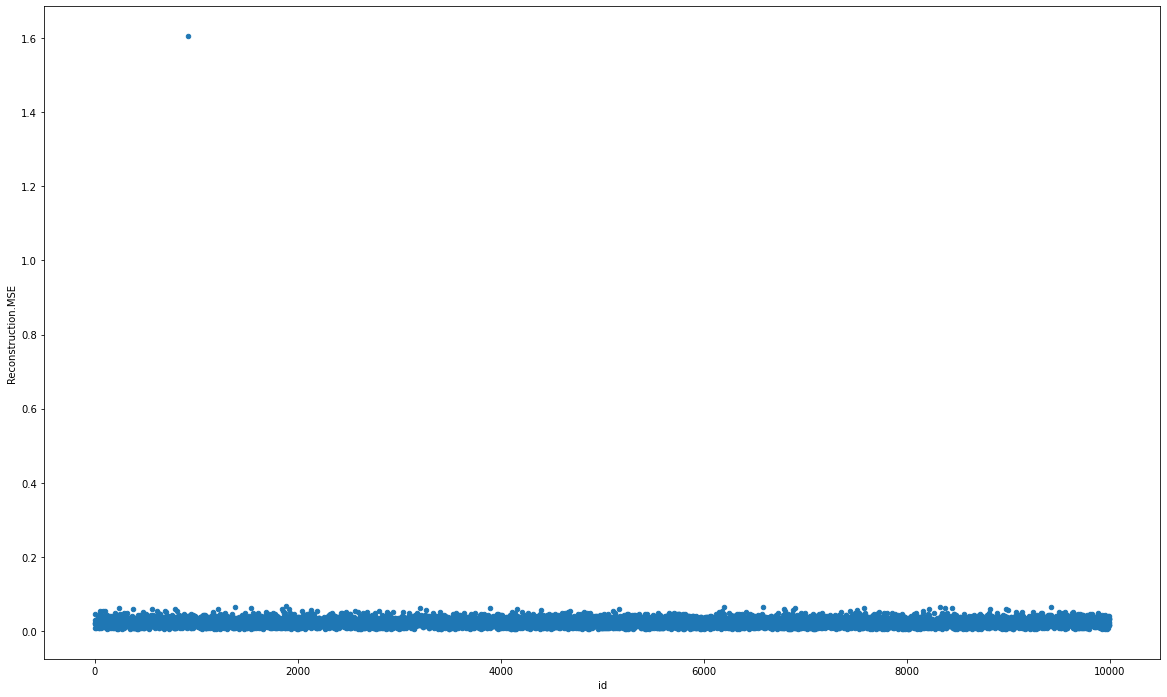

In [ ]:
test_rec_error_df = test_rec_error.as_data_frame()
test_rec_error_df['id'] = test_rec_error_df.index
test_rec_error_df.plot(kind="scatter",x="id",y="Reconstruction.MSE")

We see that the test set contains only one obvious outlier, while the rest of the points fall in the range [0.0, 0.07]

Let us join the test feature ser, including the label, with the reconstruction error and grab the outlier point and try to reconstruct it using the autoencorder model.

In [ ]:
test_with_error = test_with_label.cbind(test_rec_error)
outlier = test_with_error[test_with_error["Reconstruction.MSE"]>1.0][0,:]
outlier_recon = model.predict(outlier[predictors]).cbind(outlier["Reconstruction.MSE"]) 

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [ ]:
outlier_recon

reconstr_C1,reconstr_C2,reconstr_C3,reconstr_C4,reconstr_C5,reconstr_C6,reconstr_C7,reconstr_C8,reconstr_C9,reconstr_C10,reconstr_C11,reconstr_C12,reconstr_C13,reconstr_C14,reconstr_C15,reconstr_C16,reconstr_C17,reconstr_C18,reconstr_C19,reconstr_C20,reconstr_C21,reconstr_C22,reconstr_C23,reconstr_C24,reconstr_C25,reconstr_C26,reconstr_C27,reconstr_C28,reconstr_C29,reconstr_C30,reconstr_C31,reconstr_C32,reconstr_C33,reconstr_C34,reconstr_C35,reconstr_C36,reconstr_C37,reconstr_C38,reconstr_C39,reconstr_C40,reconstr_C41,reconstr_C42,reconstr_C43,reconstr_C44,reconstr_C45,reconstr_C46,reconstr_C47,reconstr_C48,reconstr_C49,reconstr_C50,reconstr_C51,reconstr_C52,reconstr_C53,reconstr_C54,reconstr_C55,reconstr_C56,reconstr_C57,reconstr_C58,reconstr_C59,reconstr_C60,reconstr_C61,reconstr_C62,reconstr_C63,reconstr_C64,reconstr_C65,reconstr_C66,reconstr_C67,reconstr_C68,reconstr_C69,reconstr_C70,reconstr_C71,reconstr_C72,reconstr_C73,reconstr_C74,reconstr_C75,reconstr_C76,reconstr_C77,reconstr_C78,reconstr_C79,reconstr_C80,reconstr_C81,reconstr_C82,reconstr_C83,reconstr_C84,reconstr_C85,reconstr_C86,reconstr_C87,reconstr_C88,reconstr_C89,reconstr_C90,reconstr_C91,reconstr_C92,reconstr_C93,reconstr_C94,reconstr_C95,reconstr_C96,reconstr_C97,reconstr_C98,reconstr_C99,reconstr_C100,reconstr_C101,reconstr_C102,reconstr_C103,reconstr_C104,reconstr_C105,reconstr_C106,reconstr_C107,reconstr_C108,reconstr_C109,reconstr_C110,reconstr_C111,reconstr_C112,reconstr_C113,reconstr_C114,reconstr_C115,reconstr_C116,reconstr_C117,reconstr_C118,reconstr_C119,reconstr_C120,reconstr_C121,reconstr_C122,reconstr_C123,reconstr_C124,reconstr_C125,reconstr_C126,reconstr_C127,reconstr_C128,reconstr_C129,reconstr_C130,reconstr_C131,reconstr_C132,reconstr_C133,reconstr_C134,reconstr_C135,reconstr_C136,reconstr_C137,reconstr_C138,reconstr_C139,reconstr_C140,reconstr_C141,reconstr_C142,reconstr_C143,reconstr_C144,reconstr_C145,reconstr_C146,reconstr_C147,reconstr_C148,reconstr_C149,reconstr_C150,reconstr_C151,reconstr_C152,reconstr_C153,reconstr_C154,reconstr_C155,reconstr_C156,reconstr_C157,reconstr_C158,reconstr_C159,reconstr_C160,reconstr_C161,reconstr_C162,reconstr_C163,reconstr_C164,reconstr_C165,reconstr_C166,reconstr_C167,reconstr_C168,reconstr_C169,reconstr_C170,reconstr_C171,reconstr_C172,reconstr_C173,reconstr_C174,reconstr_C175,reconstr_C176,reconstr_C177,reconstr_C178,reconstr_C179,reconstr_C180,reconstr_C181,reconstr_C182,reconstr_C183,reconstr_C184,reconstr_C185,reconstr_C186,reconstr_C187,reconstr_C188,reconstr_C189,reconstr_C190,reconstr_C191,reconstr_C192,reconstr_C193,reconstr_C194,reconstr_C195,reconstr_C196,reconstr_C197,reconstr_C198,reconstr_C199,reconstr_C200,reconstr_C201,reconstr_C202,reconstr_C203,reconstr_C204,reconstr_C205,reconstr_C206,reconstr_C207,reconstr_C208,reconstr_C209,reconstr_C210,reconstr_C211,reconstr_C212,reconstr_C213,reconstr_C214,reconstr_C215,reconstr_C216,reconstr_C217,reconstr_C218,reconstr_C219,reconstr_C220,reconstr_C221,reconstr_C222,reconstr_C223,reconstr_C224,reconstr_C225,reconstr_C226,reconstr_C227,reconstr_C228,reconstr_C229,reconstr_C230,reconstr_C231,reconstr_C232,reconstr_C233,reconstr_C234,reconstr_C235,reconstr_C236,reconstr_C237,reconstr_C238,reconstr_C239,reconstr_C240,reconstr_C241,reconstr_C242,reconstr_C243,reconstr_C244,reconstr_C245,reconstr_C246,reconstr_C247,reconstr_C248,reconstr_C249,reconstr_C250,reconstr_C251,reconstr_C252,reconstr_C253,reconstr_C254,reconstr_C255,reconstr_C256,reconstr_C257,reconstr_C258,reconstr_C259,reconstr_C260,reconstr_C261,reconstr_C262,reconstr_C263,reconstr_C264,reconstr_C265,reconstr_C266,reconstr_C267,reconstr_C268,reconstr_C269,reconstr_C270,reconstr_C271,reconstr_C272,reconstr_C273,reconstr_C274,reconstr_C275,reconstr_C276,reconstr_C277,reconstr_C278,reconstr_C279,reconstr_C280,reconstr_C281,reconstr_C282,reconstr_C283,reconstr_C284,reconstr_C285,reconstr_C286,reconstr_C287,reconstr_C288,reconstr_C289,reconstr_C290,reconstr_C291,reconstr_C292,reconstr_C293,recons

We need to define a helper function to plot a single digit image:

In [ ]:
def plot_digit(digit, title):
  df = digit.as_data_frame()
  df1 = pd.DataFrame(df)
  pixels = df1.iloc[0:1, 0:784].values.reshape(28,28)
  error = df1["Reconstruction.MSE"][0]
  fig = plt.figure()
  plt.title(title)
  plt.imshow(pixels,cmap="gray")
  error_caption = "MSE: {}".format(round(error,2))
  fig.text(.1, .1, error_caption)
  plt.show()


Next we plot the the orinal outlier and its reconstructed version

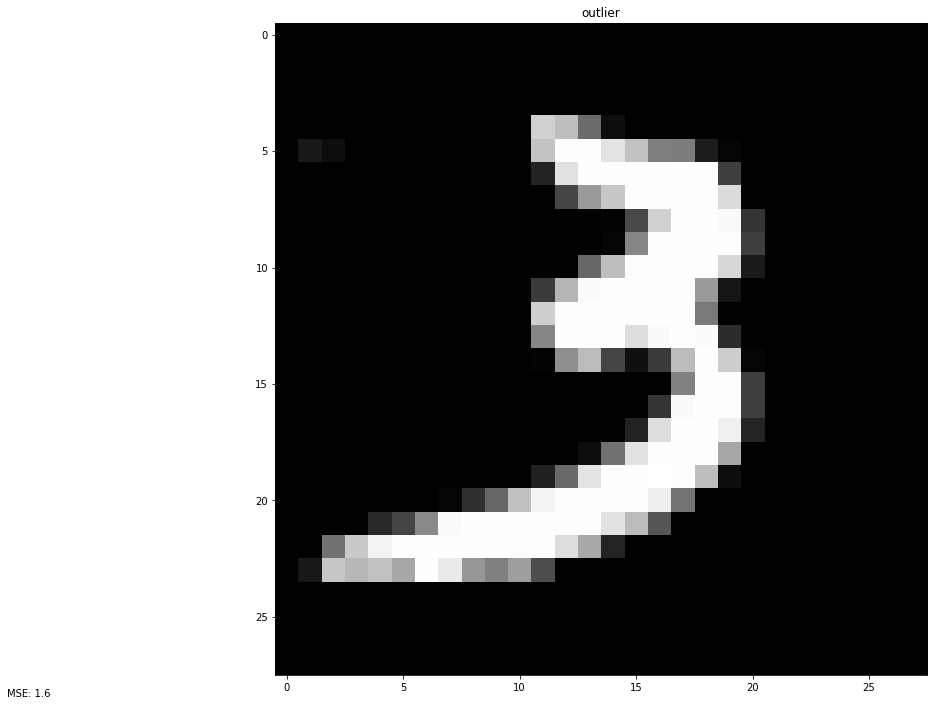

In [ ]:
plot_digit(outlier, "outlier")

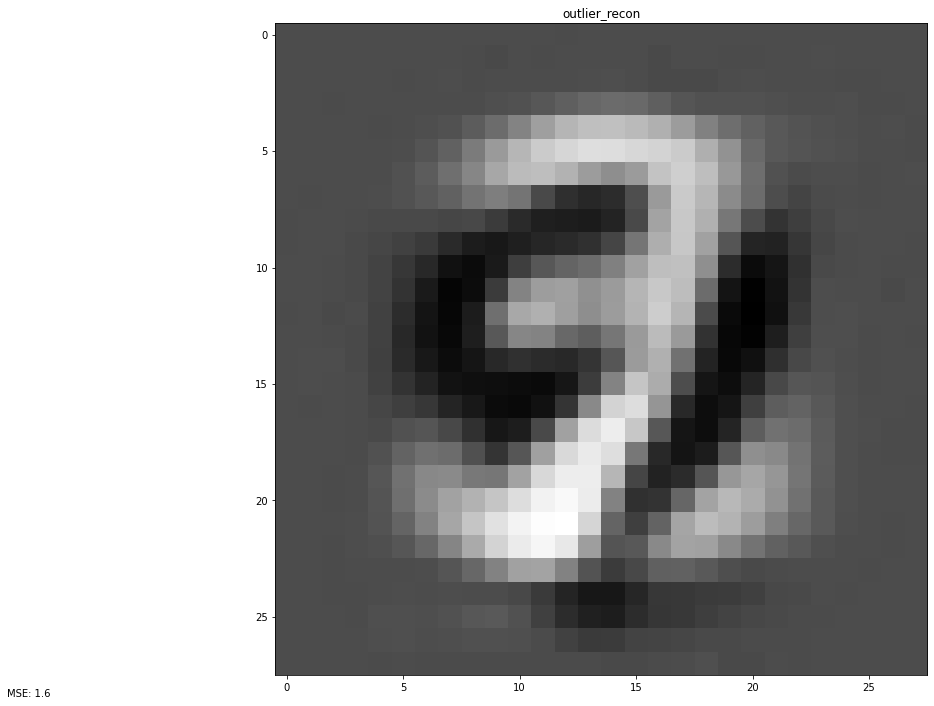

In [ ]:
plot_digit(outlier_recon, "outlier_recon")

The reconstructed version is very noisy even though the outlier seems to clearly be representing the number three.  We will see that it has one particular detail that makes it different from the rest of the other three digits.

Let us zoom into the error distribution of the remaining points

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f871b8c78d0>]],
      dtype=object)

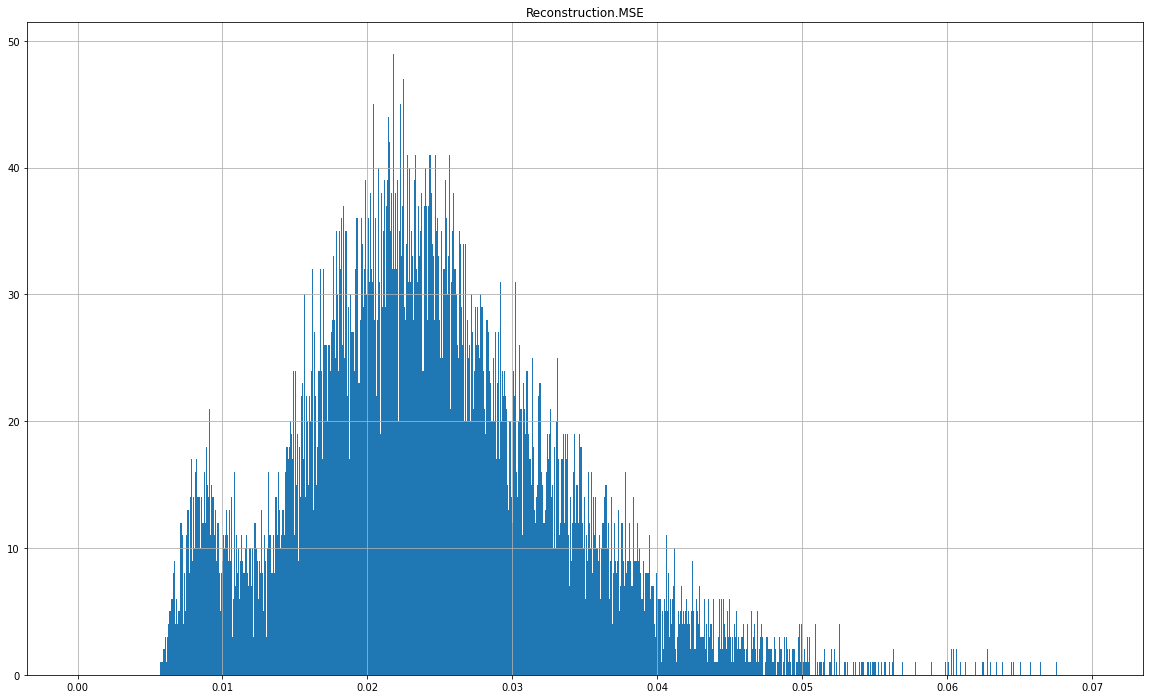

In [ ]:
test_rec_error.as_data_frame().hist(bins=1000,range=[0.0, 0.07])

From the distribution, we split the "central bell" at 0.02 into the "good" digits (on the left) and the "bad" digits (on the right).  The right most tail (greater then 0.05) could be considered the "ugly" digits or the most anomalous.

We will now pick some digits of the number three from the "good" subset and compare them with our outlier:

In [ ]:
digits_of_3 = test_with_error[(test_with_error['C785'] == 3) & (test_with_error['Reconstruction.MSE'] < 0.02)]

We extend the plot util into a function that plots a grid of images

In [ ]:
def plot_multi_digits(digits, nx, ny, title):
    df = digits[0:(nx * ny),:].as_data_frame()
    df2 = pd.DataFrame(df)
    images = [row.loc['C1':'C784'].values.reshape((28,28)) for index,row in df2.iterrows()]
    #images = [digit.reshape((28,28)) for digit in df[predictors]]
    errors = df['Reconstruction.MSE'].values
    fig = plt.figure()
    plt.title(title)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    for x in range(nx):
        for y in range(ny):
            index = nx*y+x
            ax = fig.add_subplot(ny, nx, index + 1)
            ax.imshow(images[index], cmap='gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            error_caption = '{} - MSE: {}'.format(index, round(errors[index],2)) 
            ax.text(.1,.1,error_caption)
    plt.show()


We can now plot both the original and reconstructed values of 36 random digits arranged on a 6 x 6 grid:

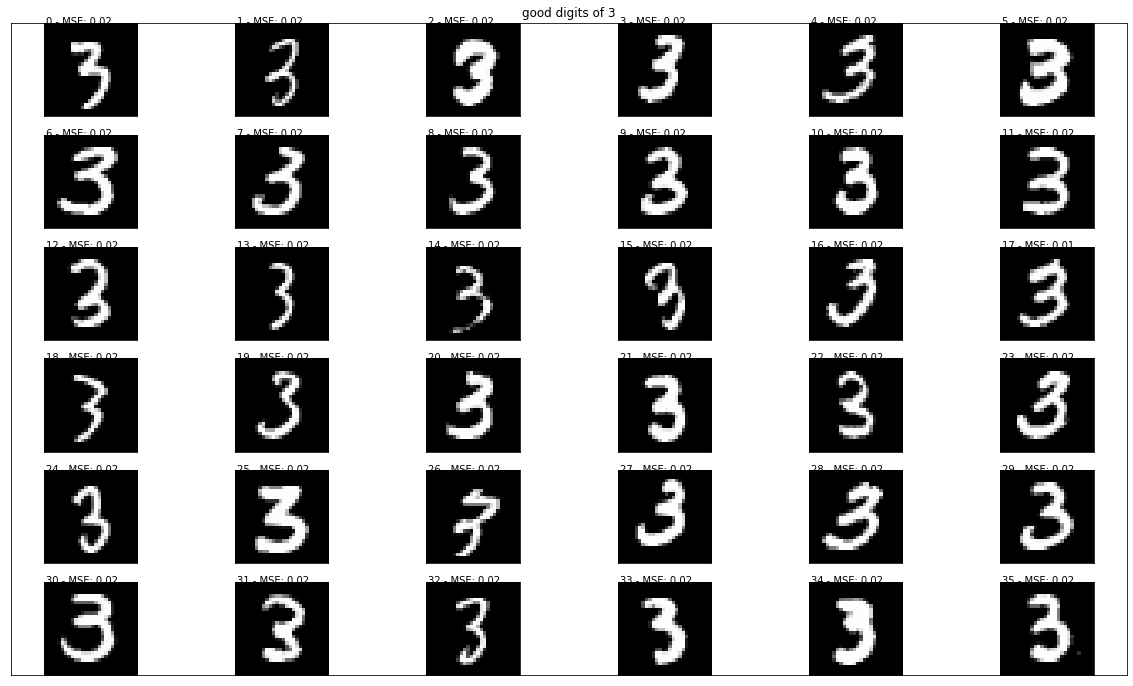

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [ ]:
plot_multi_digits(digits_of_3, 6, 6, "good digits of 3")
recon_3 = model.predict(digits_of_3[predictors]).cbind(digits_of_3['Reconstruction.MSE'])

In [ ]:
def plot_multi_recon_digits(digits, nx, ny, title):
    df = digits[0:(nx * ny),:].as_data_frame()
    df2 = pd.DataFrame(df)
    images = [row.loc['reconstr_C1':'reconstr_C784'].values.reshape((28,28)) for index,row in df2.iterrows()]
    #images = [digit.reshape((28,28)) for digit in df[predictors]]
    errors = df['Reconstruction.MSE'].values
    fig = plt.figure()
    plt.title(title)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    for x in range(nx):
        for y in range(ny):
            index = nx*y+x
            ax = fig.add_subplot(ny, nx, index + 1)
            ax.imshow(images[index], cmap='gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            error_caption = '{} - MSE: {}'.format(index, round(errors[index],2)) 
            ax.text(.1,.1,error_caption)
    plt.show()

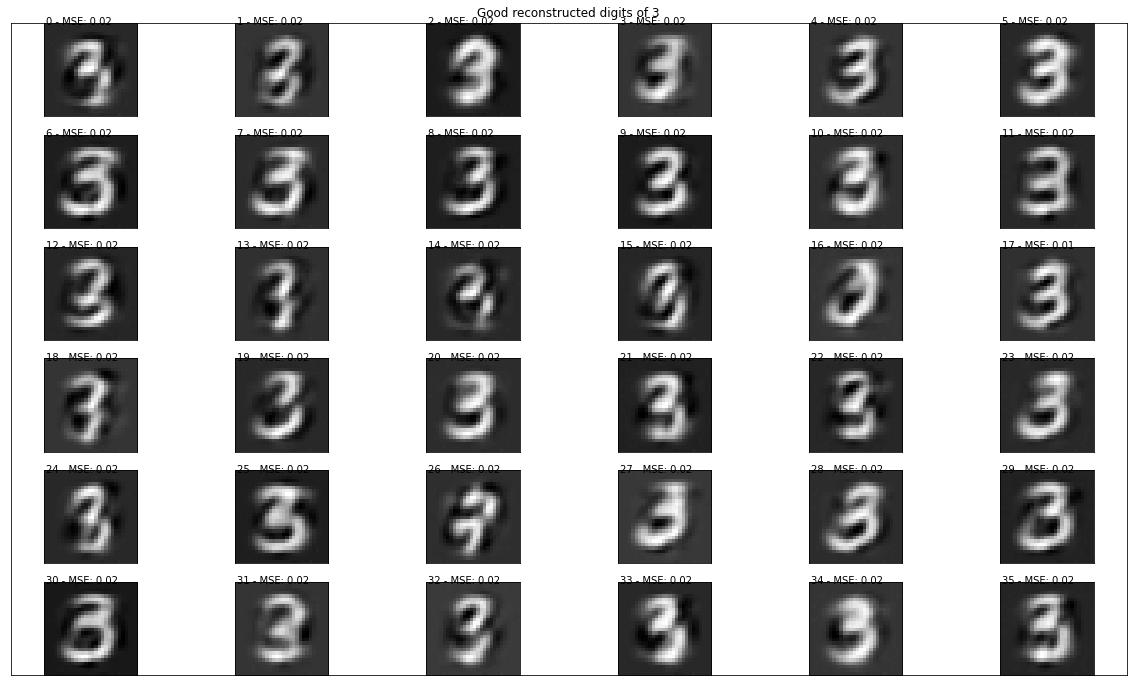

In [ ]:
plot_multi_recon_digits(recon_3,6,6,"Good reconstructed digits of 3")

At first glance, our outlier does not look very different with the good-classified ones.  Many of the reconstructed figures lok similiar to their original representation.  If we look more carefully at the figures, we can observe that none of them have the bottom-left shape of the digit so long to almost touch the corner.

Let's pick the digit with index 1, which scores 0.02, and let's copy the bottom-left part (the lat 16 x 10 pixels) from the outlier figure.  We will recompute the anomaly score to the modified iamge.

Let’s visualize reconstructed version of the good digits of number three 

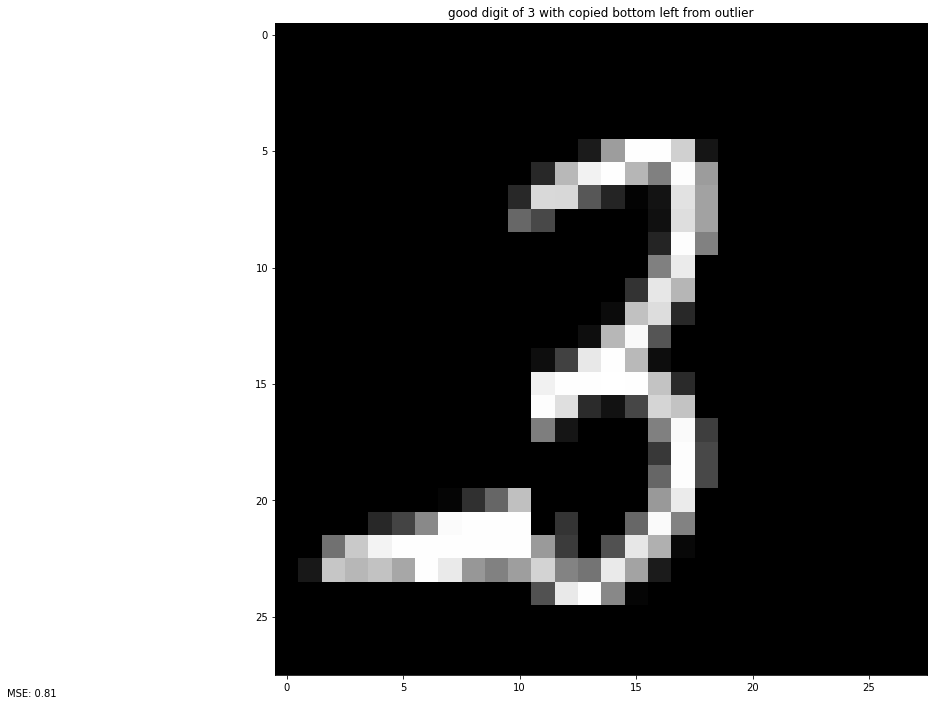

In [ ]:
good_digit_of_3 = digits_of_3[1,:]
bottom_left_area = [(y*28+x) for y in range (11,28) for x in range (0,11)]
good_digit_of_3[bottom_left_area] = outlier[bottom_left_area]
good_digit_of_3["Reconstruction.MSE"] = model.anomaly(good_digit_of_3)
plot_digit(good_digit_of_3,"good digit of 3 with copied bottom left from outlier")

The MSE went up to 0.86. ***This means the model is too sensitive to noise***. It marks a digit as an anomaly due to the “tail is close to the border” because the training data does not contain enough samples. This is an example of a false positive.

This problem can generally be solved using denoising autoencoders.  In order to discover more robust representations, we can train the model to reconstruct the original input from a noisy verions of it. 

In our case, we could mask each digit with a binomial sampling where we randomly set pixels to 0 with probablility p.  The loss function will then be the error of the reconstructed image from the noisy version and the original one. 


Since our dataset contains labels for the digits but there is no assessment about the quality of them, we will use manual inspection of bottom 100 (good) digits and top 100 (ugly) digits in a 10 x 10 grid.

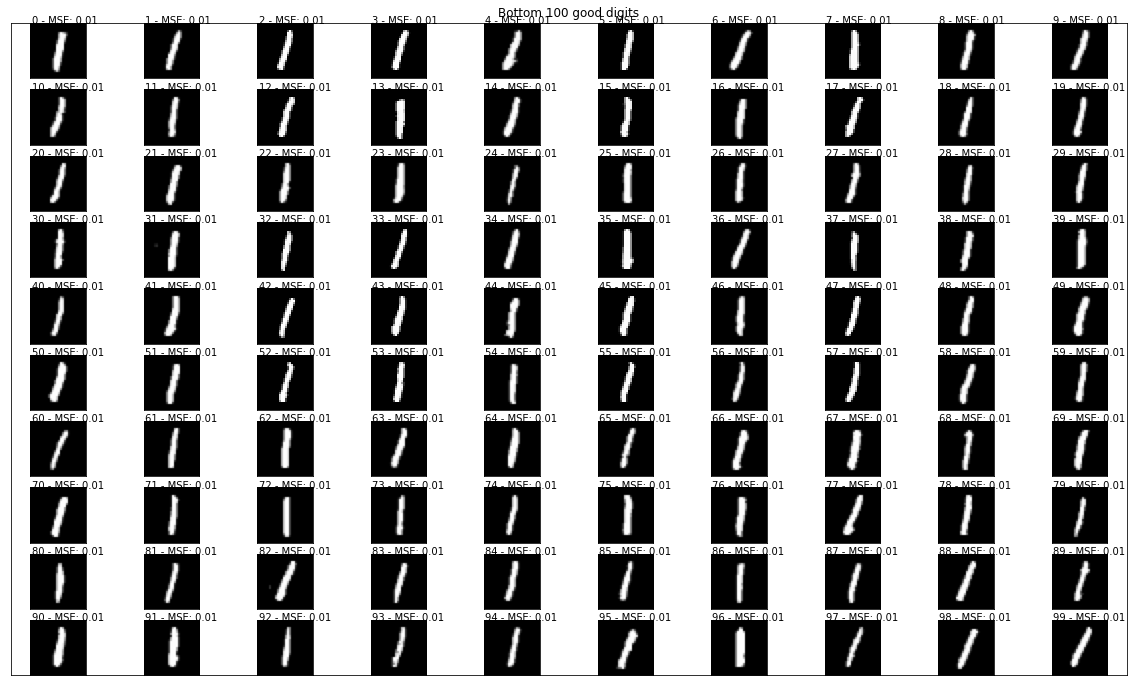

In [ ]:
sorted_test_with_error_df = test_with_error.as_data_frame().sort_values(by="Reconstruction.MSE")
test_good = sorted_test_with_error_df[:100]
df3=pd.DataFrame(test_good)
images = [row.loc["C1":"C784"].values.reshape((28,28)) for index,row in df3.iterrows()]

errors = df3["Reconstruction.MSE"].values
fig = plt.figure()
plt.title("Bottom 100 good digits")
plt.xticks(np.array([]))
plt.yticks(np.array([]))
for x in range(10):
  for y in range(10):
    index = 10*y+x
    ax = fig.add_subplot(10, 10, index + 1)
    ax.imshow(images[index], cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    error_caption = '{} - MSE: {}'.format(index, round(errors[index],2)) 
    ax.text(.1,.1,error_caption)
plt.show()

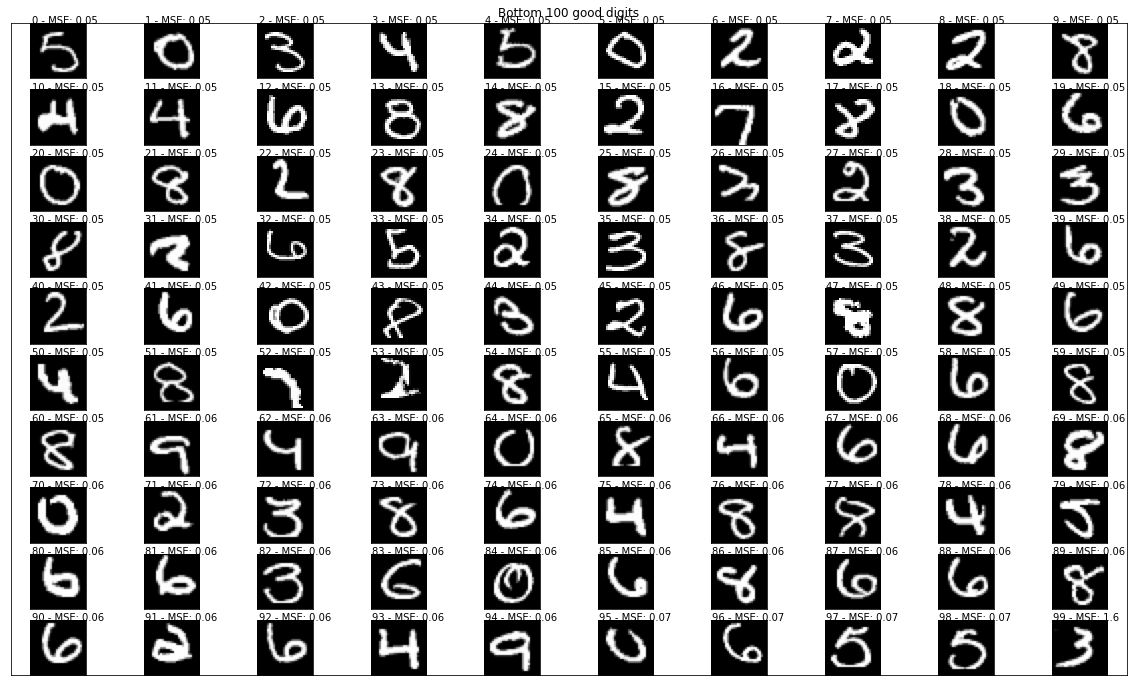

In [ ]:
test_ugly = sorted_test_with_error_df.tail(100)
df3=pd.DataFrame(test_ugly)
images = [row.loc["C1":"C784"].values.reshape((28,28)) for index,row in df3.iterrows()]

errors = df3["Reconstruction.MSE"].values
fig = plt.figure()
plt.title("Bottom 100 good digits")
plt.xticks(np.array([]))
plt.yticks(np.array([]))
for x in range(10):
  for y in range(10):
    index = 10*y+x
    ax = fig.add_subplot(10, 10, index + 1)
    ax.imshow(images[index], cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    error_caption = '{} - MSE: {}'.format(index, round(errors[index],2)) 
    ax.text(.1,.1,error_caption)
plt.show()

From the figures, it is easy to see that "the good" represent number one, which is the easierst digit to write due to its simple strucutre of a straight line.  Thus, digits of numer one are less prone to be miswritten.

The bottom group is clearly ugly.  The round shapes make it harder to distingusih between similar numbers and it strongly depends on the specific person's handwriting.  Thus, those are the most likely to represent "anomalies".  They are most likely to deviate from the majority of the population's writing style.